## Visual Comparison Between Different Classification Methods in Shogun

Notebook by Youssef Emad El-Din (Github ID: <a href="https://github.com/youssef-emad/">youssef-emad</a>)

This Notebook demonstrates different classification methods in Shogun.The point is to compare and visualize the decision boundaries of different classifiers on two different datasets, where one is linear seperable, and one is not.

1. <a href ="#section1">Data Generation and Visualization</a>
2. <a href ="#section2">Support Vector Machine</a>
 1. <a href ="#section2a">Linear SVM</a>
 2. <a href ="#section2b">Gaussian Kernel</a>
 3. <a href ="#section2c">Sigmoid Kernel</a>
 4. <a href ="#section2d">Polynomial Kernel</a>
3. <a href ="#section3">Naive Bayes</a>
4. <a href ="#section4">Nearest Neighbors</a>
5. <a href ="#section5">Linear Discriminant Analysis</a>
6. <a href ="#section6">Quadratic Discriminat Analysis</a>
7. <a href ="#section7">Gaussian Process</a>
 1. <a href ="#section7a">Logit Likelihood model</a>
 2. <a href ="#section7b">Probit Likelihood model</a>
8. <a href ="#section8">Putting It All Together</a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from modshogun import *

In [2]:
#Needed lists for the final plot
classifiers_linear = []*10
classifiers_non_linear = []*10
classifiers_names = []*10
fadings = []*10

## <a id = "section1">Data Generation and Visualization</a>

In [3]:
positive_class = np.random.randn(2,100) + 2
negative_class = np.random.randn(2,100) - 2

labels_linear = np.concatenate(np.array((np.ones(100, dtype=np.double), -np.ones(100, dtype=np.double))))
feats_linear = np.hstack((positive_class,negative_class))

Second Dataset is generated using generate_classification_toy_data method defined in the <a href="http://www.shogun-toolbox.org/static/notebook/current/gaussian_processes.html">Gaussian Processes notebook</a>.

In [4]:
def generate_classification_toy_data(n_train=400, mean_a=np.asarray([0, 0]), std_dev_a=1.0, mean_b=3, std_dev_b=0.5):

    # positive examples are distributed normally
    X1 = (np.random.randn(n_train, 2)*std_dev_a+mean_a).T

    # negative examples have a "ring"-like form
    r = np.random.randn(n_train)*std_dev_b+mean_b
    angle = np.random.randn(n_train)*2*np.pi
    X2 = np.array([r*np.cos(angle)+mean_a[0], r*np.sin(angle)+mean_a[1]])

    # stack positive and negative examples in a single array
    X_train = np.hstack((X1,X2))

    # label positive examples with +1, negative with -1
    y_train = np.zeros(n_train*2)
    y_train[:n_train] = 1
    y_train[n_train:] = -1

    return X_train, y_train

In [5]:
feats_non_linear, labels_non_linear=generate_classification_toy_data()

Data visualization methods.

In [6]:
def plot_binary_data(plot,X_train, y_train):
    plot.xlabel(r"$x$")
    plot.ylabel(r"$y$")
    plot.plot(X_train[0, np.argwhere(y_train == 1)], X_train[1, np.argwhere(y_train == 1)], 'ro')
    plot.plot(X_train[0, np.argwhere(y_train == -1)], X_train[1, np.argwhere(y_train == -1)], 'bo')

In [7]:
def compute_plot_isolines(classifier,features,size=200,fading=True):
    
    x1 = np.linspace(1.2*min(features[0]), 1.2*max(features[0]), size)
    x2 = np.linspace(1.2*min(features[1]), 1.2*max(features[1]), size)

    x, y = np.meshgrid(x1, x2)

    plot_features=RealFeatures(np.array((np.ravel(x), np.ravel(y))))
    
    if fading == True:
        plot_labels = classifier.apply(plot_features).get_values()
    else:
        plot_labels = classifier.apply(plot_features).get_labels()
    z = plot_labels.reshape((size, size))
    return x,y,z

In [8]:
def plot_model(plot,classifier,features,labels,fading=True):
    x,y,z = compute_plot_isolines(classifier,features,fading=fading)
    plot.pcolor(x,y,z,cmap='RdBu_r')
    plot.contour(x, y, z, linewidths=1, colors='black')
    plot_binary_data(plot,features, labels)
    

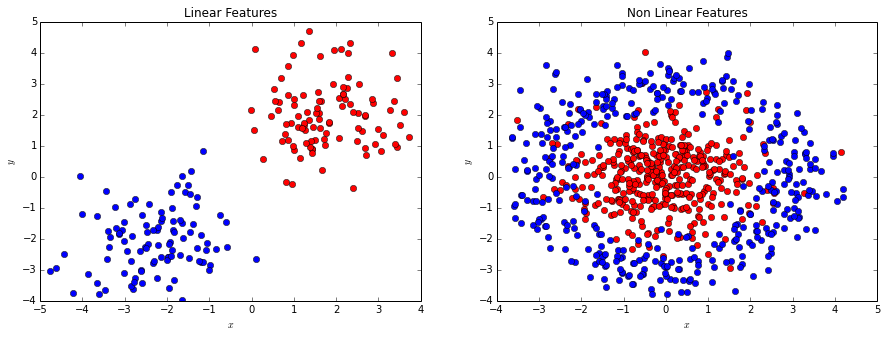

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Linear Features")
plot_binary_data(plt,feats_linear, labels_linear)
plt.subplot(122)
plt.title("Non Linear Features")
plot_binary_data(plt,feats_non_linear, labels_non_linear)

Transformation of features to Shogun format using <a href="http://www.shogun-toolbox.org/doc/en/current/classshogun_1_1CDenseFeatures.html">RealFeatures</a> and <a href="http://www.shogun-toolbox.org/doc/en/latest/classshogun_1_1CBinaryLabels.html">BinaryLables</a> classes.

In [10]:
shogun_feats_linear = RealFeatures(feats_linear)
shogun_feats_non_linear = RealFeatures(feats_non_linear)

shogun_labels_linear = BinaryLabels(labels_linear)
shogun_labels_non_linear = BinaryLabels(labels_non_linear)

## <a id="section2">Support Vector Machine</a>

<a id="section2a">Linear SVM</a>

Shogun provide <a href="http://www.shogun-toolbox.org/doc/en/latest/classshogun_1_1CLibLinear.html">Liblinear</a> which is a library for large- scale linear learning focusing on SVM used for classification

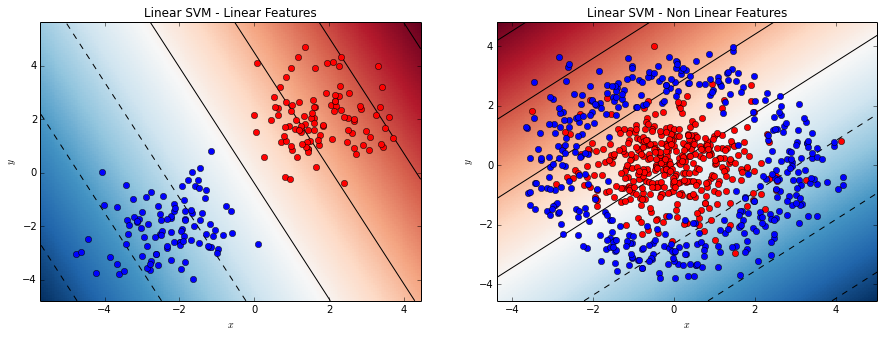

In [12]:
plt.figure(figsize=(15,5))
c  = 0.5
epsilon =1e-3

svm_linear = LibLinear(c,shogun_feats_linear,shogun_labels_linear)
svm_linear.set_liblinear_solver_type(L2R_L2LOSS_SVC) 
svm_linear.set_epsilon(epsilon)
svm_linear.train()
classifiers_linear.append(svm_linear)
classifiers_names.append("SVM Linear")
fadings.append(True)

plt.subplot(121)
plt.title("Linear SVM - Linear Features")
plot_model(plt,svm_linear,feats_linear,labels_linear)

svm_non_linear = LibLinear(c,shogun_feats_non_linear,shogun_labels_non_linear)
svm_non_linear.set_liblinear_solver_type(L2R_L2LOSS_SVC) 
svm_non_linear.set_epsilon(epsilon)
svm_non_linear.train()
classifiers_non_linear.append(svm_non_linear)

plt.subplot(122)
plt.title("Linear SVM - Non Linear Features")
plot_model(plt,svm_non_linear,feats_non_linear,labels_non_linear)

## SVM - Kernels

Shogun provides many options for using kernel functions. <a href="http://www.shogun-toolbox.org/doc/en/latest/classshogun_1_1CKernel.html">CKernel</a> is the base class for kernels.

<a id ="section2b" href = "http://www.shogun-toolbox.org/doc/en/latest/classshogun_1_1CGaussianKernel.html">Gaussian Kernel</a>

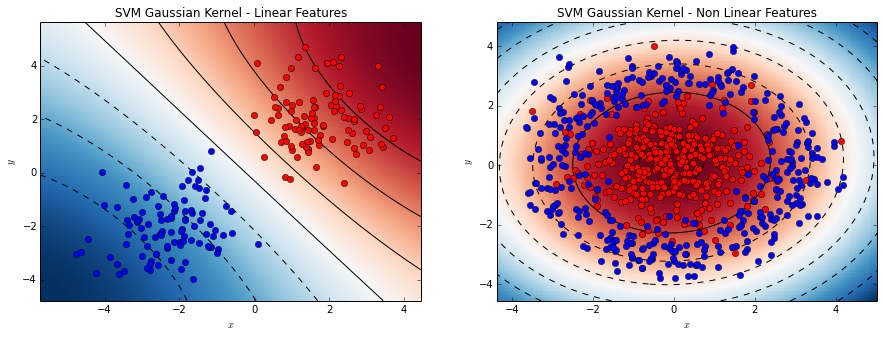

In [13]:
gaussian_c=0.7

gaussian_kernel_linear=GaussianKernel(shogun_feats_linear, shogun_feats_linear, 100)
gaussian_svm_linear=LibSVM(gaussian_c, gaussian_kernel_linear, shogun_labels_linear)
gaussian_svm_linear.train()
classifiers_linear.append(gaussian_svm_linear)
fadings.append(True)

gaussian_kernel_non_linear=GaussianKernel(shogun_feats_non_linear, shogun_feats_non_linear, 100)
gaussian_svm_non_linear=LibSVM(gaussian_c, gaussian_kernel_non_linear, shogun_labels_non_linear)
gaussian_svm_non_linear.train()
classifiers_non_linear.append(gaussian_svm_non_linear)
classifiers_names.append("SVM Gaussian Kernel")

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("SVM Gaussian Kernel - Linear Features")
plot_model(plt,gaussian_svm_linear,feats_linear,labels_linear)

plt.subplot(122)
plt.title("SVM Gaussian Kernel - Non Linear Features")
plot_model(plt,gaussian_svm_non_linear,feats_non_linear,labels_non_linear)

<a id ="section2c" href="http://www.shogun-toolbox.org/doc/en/latest/classshogun_1_1CSigmoidKernel.html">Sigmoid Kernel</a>

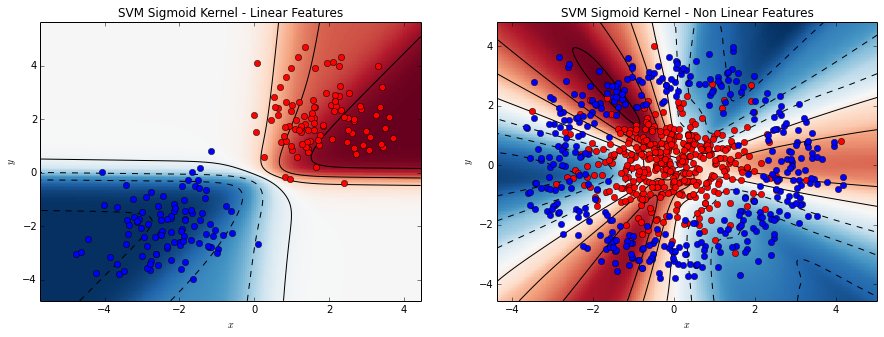

In [14]:
sigmoid_c = 0.9

sigmoid_kernel_linear = SigmoidKernel(shogun_feats_linear,shogun_feats_linear,200,1,0.5)
sigmoid_svm_linear = LibSVM(sigmoid_c, sigmoid_kernel_linear, shogun_labels_linear)
sigmoid_svm_linear.train()
classifiers_linear.append(sigmoid_svm_linear)
classifiers_names.append("SVM Sigmoid Kernel")
fadings.append(True)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("SVM Sigmoid Kernel - Linear Features")
plot_model(plt,sigmoid_svm_linear,feats_linear,labels_linear)

sigmoid_kernel_non_linear = SigmoidKernel(shogun_feats_non_linear,shogun_feats_non_linear,400,2.5,2)
sigmoid_svm_non_linear = LibSVM(sigmoid_c, sigmoid_kernel_non_linear, shogun_labels_non_linear)
sigmoid_svm_non_linear.train()
classifiers_non_linear.append(sigmoid_svm_non_linear)

plt.subplot(122)
plt.title("SVM Sigmoid Kernel - Non Linear Features")
plot_model(plt,sigmoid_svm_non_linear,feats_non_linear,labels_non_linear)

<a id ="section2d" href="http://www.shogun-toolbox.org/doc/en/latest/classshogun_1_1CPolyKernel.html">Polynomial Kernel</a>

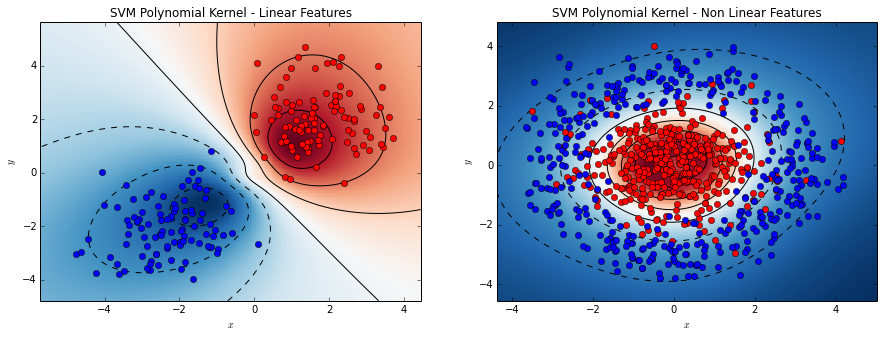

In [15]:
poly_c = 0.5
degree = 4

poly_kernel_linear = PolyKernel(shogun_feats_linear, shogun_feats_linear, degree, True)
poly_svm_linear = LibSVM(poly_c, poly_kernel_linear, shogun_labels_linear)
poly_svm_linear.train()
classifiers_linear.append(poly_svm_linear)
classifiers_names.append("SVM Polynomial kernel")
fadings.append(True)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("SVM Polynomial Kernel - Linear Features")
plot_model(plt,poly_svm_linear,feats_linear,labels_linear)

poly_kernel_non_linear=PolyKernel(shogun_feats_non_linear, shogun_feats_non_linear, degree, True)
poly_svm_non_linear = LibSVM(poly_c, poly_kernel_non_linear, shogun_labels_non_linear)
poly_svm_non_linear.train()
classifiers_non_linear.append(poly_svm_non_linear)

plt.subplot(122)
plt.title("SVM Polynomial Kernel - Non Linear Features")
plot_model(plt,poly_svm_non_linear,feats_non_linear,labels_non_linear)

## <a id ="section3" href="http://www.shogun-toolbox.org/doc/en/latest/classshogun_1_1CGaussianNaiveBayes.html">Naive Bayes</a>

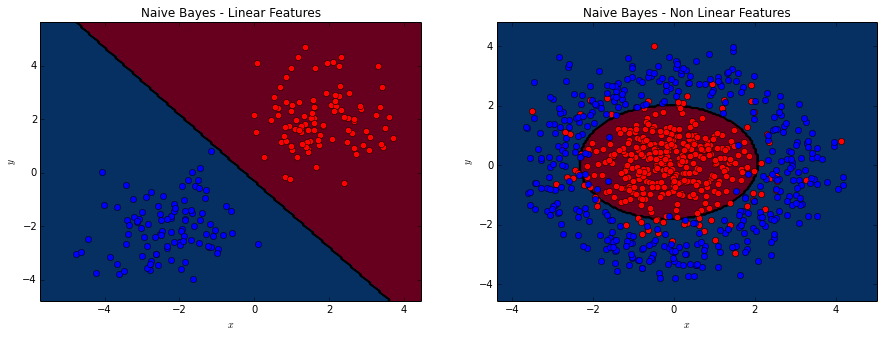

In [16]:
multiclass_labels_linear = shogun_labels_linear.get_labels()
for i in range(0,len(multiclass_labels_linear)):
    if multiclass_labels_linear[i] == -1:
        multiclass_labels_linear[i] = 0

multiclass_labels_non_linear = shogun_labels_non_linear.get_labels()
for i in range(0,len(multiclass_labels_non_linear)):
    if multiclass_labels_non_linear[i] == -1:
        multiclass_labels_non_linear[i] = 0


shogun_multiclass_labels_linear = MulticlassLabels(multiclass_labels_linear)
shogun_multiclass_labels_non_linear = MulticlassLabels(multiclass_labels_non_linear)

naive_bayes_linear = GaussianNaiveBayes()
naive_bayes_linear.set_features(shogun_feats_linear)
naive_bayes_linear.set_labels(shogun_multiclass_labels_linear)
naive_bayes_linear.train()
classifiers_linear.append(naive_bayes_linear)
classifiers_names.append("Naive Bayes")
fadings.append(False)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Naive Bayes - Linear Features")
plot_model(plt,naive_bayes_linear,feats_linear,labels_linear,fading=False)

naive_bayes_non_linear = GaussianNaiveBayes()
naive_bayes_non_linear.set_features(shogun_feats_non_linear)
naive_bayes_non_linear.set_labels(shogun_multiclass_labels_non_linear)
naive_bayes_non_linear.train()
classifiers_non_linear.append(naive_bayes_non_linear)

plt.subplot(122)
plt.title("Naive Bayes - Non Linear Features")
plot_model(plt,naive_bayes_non_linear,feats_non_linear,labels_non_linear,fading=False)

## <a id ="section4" href="http://www.shogun-toolbox.org/doc/en/current/classshogun_1_1CKNN.html">Nearest Neighbors</a>

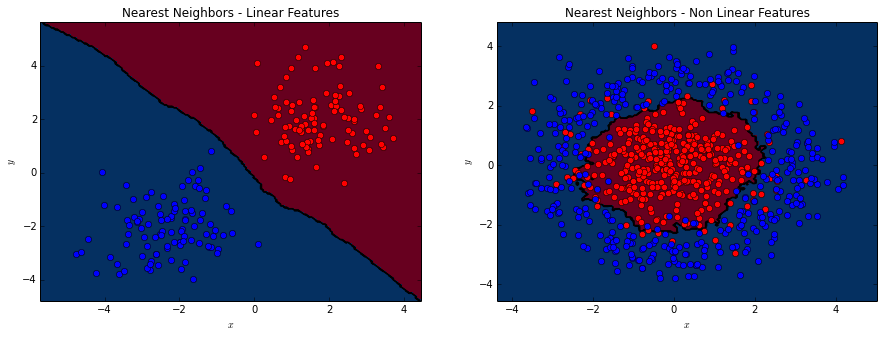

In [17]:
number_of_neighbors = 10

distances_linear = EuclideanDistance(shogun_feats_linear, shogun_feats_linear)
knn_linear = KNN(number_of_neighbors,distances_linear,shogun_labels_linear)
knn_linear.train()
classifiers_linear.append(knn_linear)
classifiers_names.append("Nearest Neighbors")
fadings.append(False)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Nearest Neighbors - Linear Features")
plot_model(plt,knn_linear,feats_linear,labels_linear,fading=False)

distances_non_linear = EuclideanDistance(shogun_feats_non_linear, shogun_feats_non_linear)
knn_non_linear = KNN(number_of_neighbors,distances_non_linear,shogun_labels_non_linear)
knn_non_linear.train()
classifiers_non_linear.append(knn_non_linear)

plt.subplot(122)
plt.title("Nearest Neighbors - Non Linear Features")
plot_model(plt,knn_non_linear,feats_non_linear,labels_non_linear,fading=False)

## <a id ="section5" href="http://www.shogun-toolbox.org/doc/en/current/classshogun_1_1CLDA.html">Linear Discriminant Analysis</a>

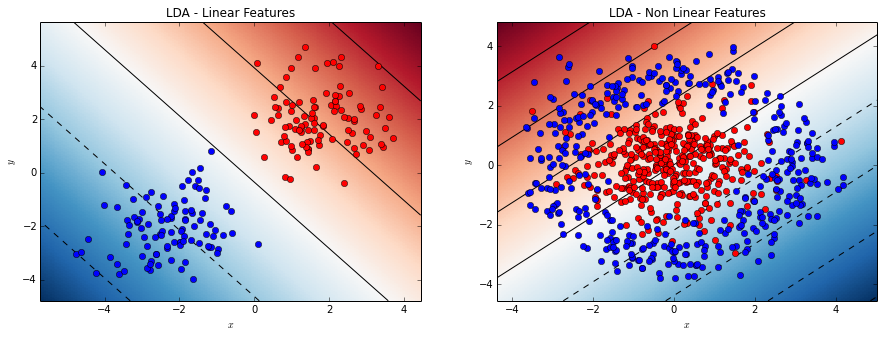

In [18]:
gamma = 0.1

lda_linear = LDA(gamma, shogun_feats_linear, shogun_labels_linear)
lda_linear.train()
classifiers_linear.append(lda_linear)
classifiers_names.append("LDA")
fadings.append(True)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("LDA - Linear Features")
plot_model(plt,lda_linear,feats_linear,labels_linear)

lda_non_linear = LDA(gamma, shogun_feats_non_linear, shogun_labels_non_linear)
lda_non_linear.train()
classifiers_non_linear.append(lda_non_linear)

plt.subplot(122)
plt.title("LDA - Non Linear Features")
plot_model(plt,lda_non_linear,feats_non_linear,labels_non_linear)

## <a id ="section6" href="http://www.shogun-toolbox.org/doc/en/current/classshogun_1_1CQDA.html">Quadratic Discriminant Analysis</a>

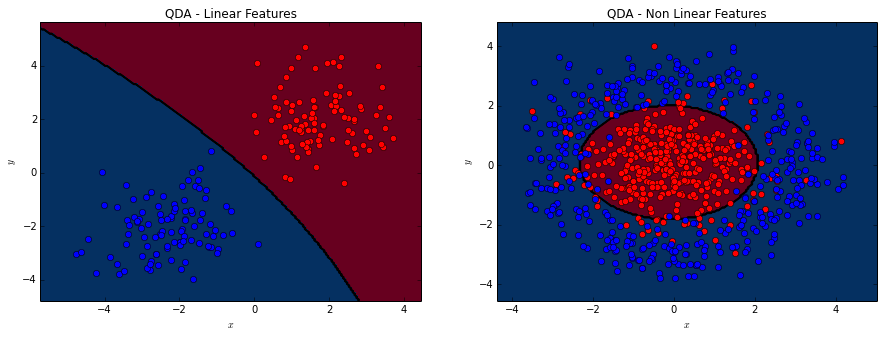

In [19]:
qda_linear = QDA(shogun_feats_linear, shogun_multiclass_labels_linear)
qda_linear.train()
classifiers_linear.append(qda_linear)
classifiers_names.append("QDA")
fadings.append(False)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("QDA - Linear Features")
plot_model(plt,qda_linear,feats_linear,labels_linear,fading=False)

qda_non_linear = QDA(shogun_feats_non_linear, shogun_multiclass_labels_non_linear)
qda_non_linear.train()
classifiers_non_linear.append(qda_non_linear)

plt.subplot(122)
plt.title("QDA - Non Linear Features")
plot_model(plt,qda_non_linear,feats_non_linear,labels_non_linear,fading=False)

## <a id ="section7" href="http://www.shogun-toolbox.org/doc/en/current/classshogun_1_1CGaussianProcessBinaryClassification.html">Gaussian Process</a>

<a id ="section7a">Logit Likelihood model</a>

Shogun's <a href= "http://www.shogun-toolbox.org/doc/en/current/classshogun_1_1CLogitLikelihood.html">CLogitLikelihood</a> and <a href="http://www.shogun-toolbox.org/doc/en/current/classshogun_1_1CEPInferenceMethod.html">CEPInferenceMethod</a> classes are used.

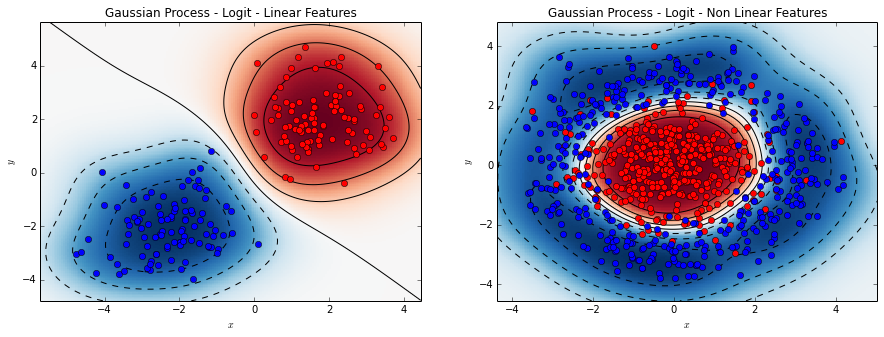

In [20]:
# create Gaussian kernel with width = 2.0
kernel = GaussianKernel(10, 2)
# create zero mean function
zero_mean = ZeroMean()
# create logit likelihood model
likelihood = LogitLikelihood()
# specify EP approximation inference method
inference_model_linear = EPInferenceMethod(kernel, shogun_feats_linear, zero_mean, shogun_labels_linear, likelihood)
# create and train GP classifier, which uses Laplace approximation
gaussian_logit_linear = GaussianProcessClassification(inference_model_linear)
gaussian_logit_linear.train()
classifiers_linear.append(gaussian_logit_linear)
classifiers_names.append("Gaussian Process Logit")
fadings.append(True)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Gaussian Process - Logit - Linear Features")
plot_model(plt,gaussian_logit_linear,feats_linear,labels_linear)

inference_model_non_linear = EPInferenceMethod(kernel, shogun_feats_non_linear, zero_mean,
                                               shogun_labels_non_linear, likelihood)
gaussian_logit_non_linear = GaussianProcessClassification(inference_model_non_linear)
gaussian_logit_non_linear.train()
classifiers_non_linear.append(gaussian_logit_non_linear)

plt.subplot(122)
plt.title("Gaussian Process - Logit - Non Linear Features")
plot_model(plt,gaussian_logit_non_linear,feats_non_linear,labels_non_linear)

<a id ="section7b">Probit Likelihood model</a> 

Shogun's <a href="http://www.shogun-toolbox.org/doc/en/current/classshogun_1_1CProbitLikelihood.html">CProbitLikelihood</a> class is used.

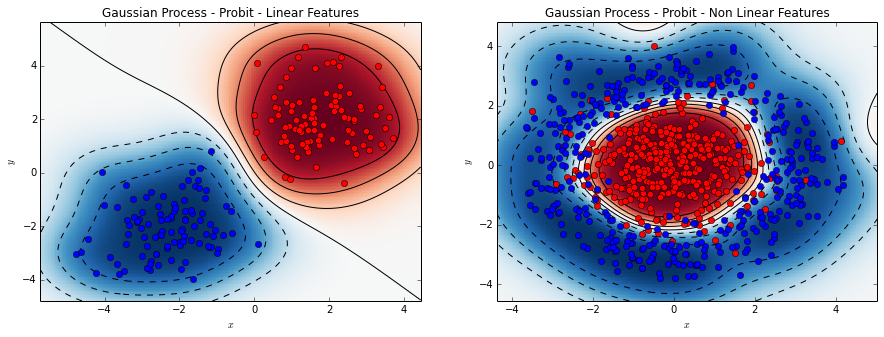

In [21]:
likelihood = ProbitLikelihood()

inference_model_linear = EPInferenceMethod(kernel, shogun_feats_linear, zero_mean, shogun_labels_linear, likelihood)
gaussian_probit_linear = GaussianProcessClassification(inference_model_linear)
gaussian_probit_linear.train()
classifiers_linear.append(gaussian_probit_linear)
classifiers_names.append("Gaussian Process Probit")
fadings.append(True)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Gaussian Process - Probit - Linear Features")
plot_model(plt,gaussian_probit_linear,feats_linear,labels_linear)

inference_model_non_linear = EPInferenceMethod(kernel, shogun_feats_non_linear,
                                               zero_mean, shogun_labels_non_linear, likelihood)
gaussian_probit_non_linear = GaussianProcessClassification(inference_model_non_linear)
gaussian_probit_non_linear.train()
classifiers_non_linear.append(gaussian_probit_non_linear)

plt.subplot(122)
plt.title("Gaussian Process - Probit - Non Linear Features")
plot_model(plt,gaussian_probit_non_linear,feats_non_linear,labels_non_linear)

## <a id="section8">Putting It All Together</a>

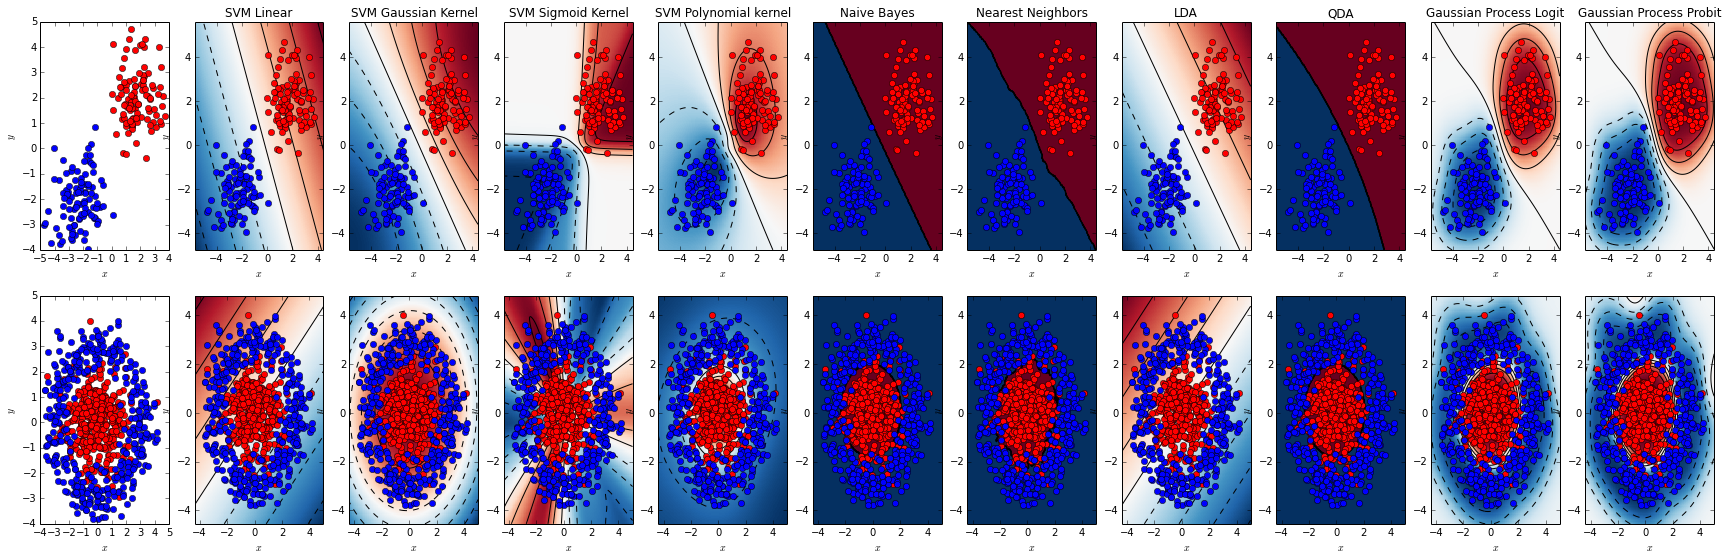

In [22]:
figure = plt.figure(figsize=(30,9))
plt.subplot(2,11,1)
plot_binary_data(plt,feats_linear, labels_linear)
for i in range(0,10):
    plt.subplot(2,11,i+2)
    plt.title(classifiers_names[i])
    plot_model(plt,classifiers_linear[i],feats_linear,labels_linear,fading=fadings[i])

plt.subplot(2,11,12)
plot_binary_data(plt,feats_non_linear, labels_non_linear)

for i in range(0,10):
    plt.subplot(2,11,13+i)
    plot_model(plt,classifiers_non_linear[i],feats_non_linear,labels_non_linear,fading=fadings[i])
    